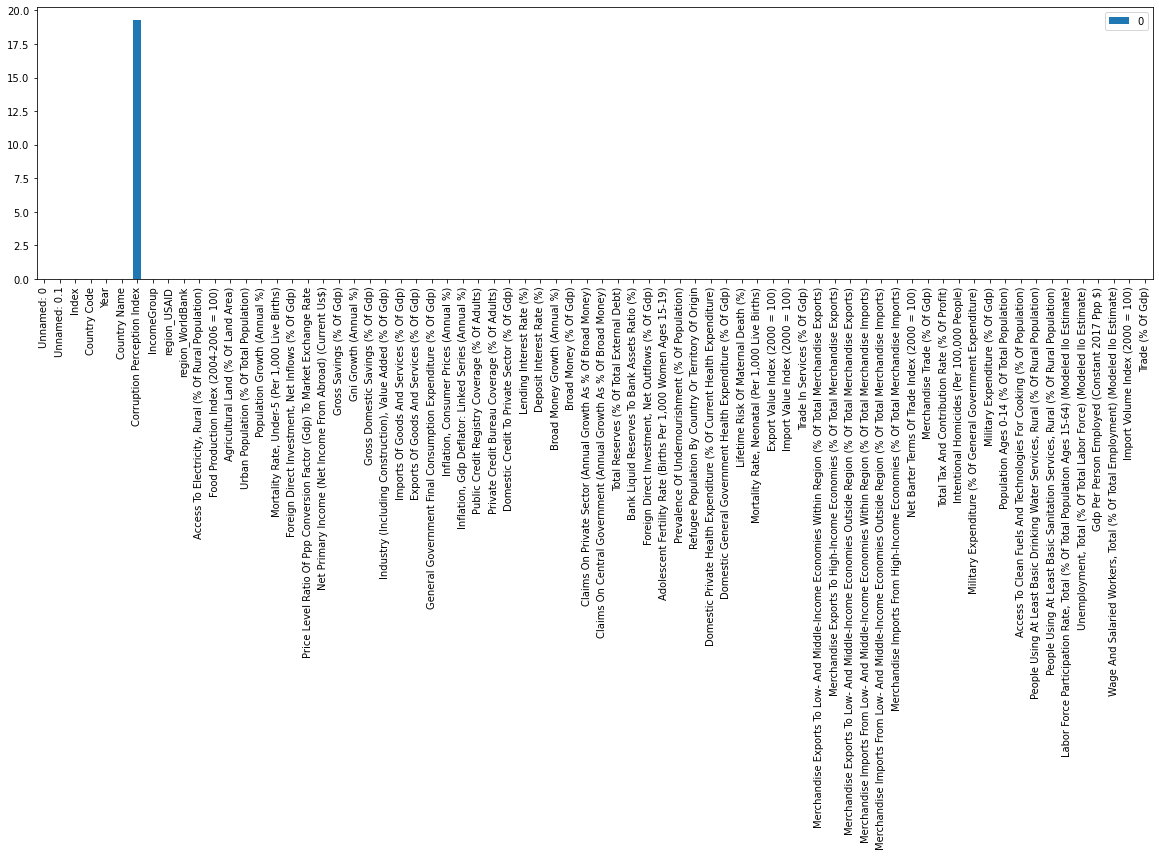

In [1]:
import pandas as pd

df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/final.csv')
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))
df = df.dropna()

In [2]:
## Researving this column for the end
df_RWB = df['region_WorldBank']

# dropping unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1','region_WorldBank','Country Code','Country Name','Year'],axis=1,inplace=True)
df.dropna()

,Index,Corruption Perception Index,IncomeGroup,region_USAID,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Urban Population (% Of Total Population),Population Growth (Annual %),"Mortality Rate, Under-5 (Per 1,000 Live Births)",...,Population Ages 0-14 (% Of Total Population),Access To Clean Fuels And Technologies For Cooking (% Of Population),"People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)","People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)","Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)",Gdp Per Person Employed (Constant 2017 Ppp $),"Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)",Import Volume Index (2000 = 100),Trade (% Of Gdp)
56,196,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
57,197,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
58,198,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
59,199,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
60,200,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,5359,37.0,Lower middle income,Sub-Saharan Africa (SSA),13.997699,171.55394,32.476466,42.976,2.951583,64.3,...,45.411369,16.75112,41.952058,18.932012,75.505997,11.626,9648.782217,21.349001,567.892902,71.585759
4020,5360,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4021,5361,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4022,5362,34.0,Lower middle income,Sub-Saharan Africa (SSA),13.775150,153.82510,34.782422,44.072,2.892373,61.7,...,44.462509,17.74318,45.556623,18.179606,75.259003,11.425,9479.540064,21.563000,344.359603,70.035035


In [3]:
#### PRE PROCESSING ###

In [4]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels, we will only do it for columns where we see a level, it is in order  
label_encoder = preprocessing.LabelEncoder()
df['IncomeGroup']= label_encoder.fit_transform(df['IncomeGroup'])

In [5]:
#Categorical Columns
object_type = df.select_dtypes(include=['object']).columns.to_list()
print(object_type)

['region_USAID']


In [6]:
## Seperating the data. 

y = df[['Corruption Perception Index']]
X = df.drop(['Corruption Perception Index','Index'],axis=1, inplace = True)

#one hot encoding the coulmns 
X = pd.get_dummies(df)


# SCALING THE DATA
#we will see if this helps in the end
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
#drop region world bank when doing modelling and don't use index
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
#Model Fitting

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(random_seed = 42)
model.fit(X_train, y_train)

/Users/vibhuverma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[14:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { random_seed } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_seed=42, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))

0.3446153846153846
0.9432433082794461
5.141538461538461


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

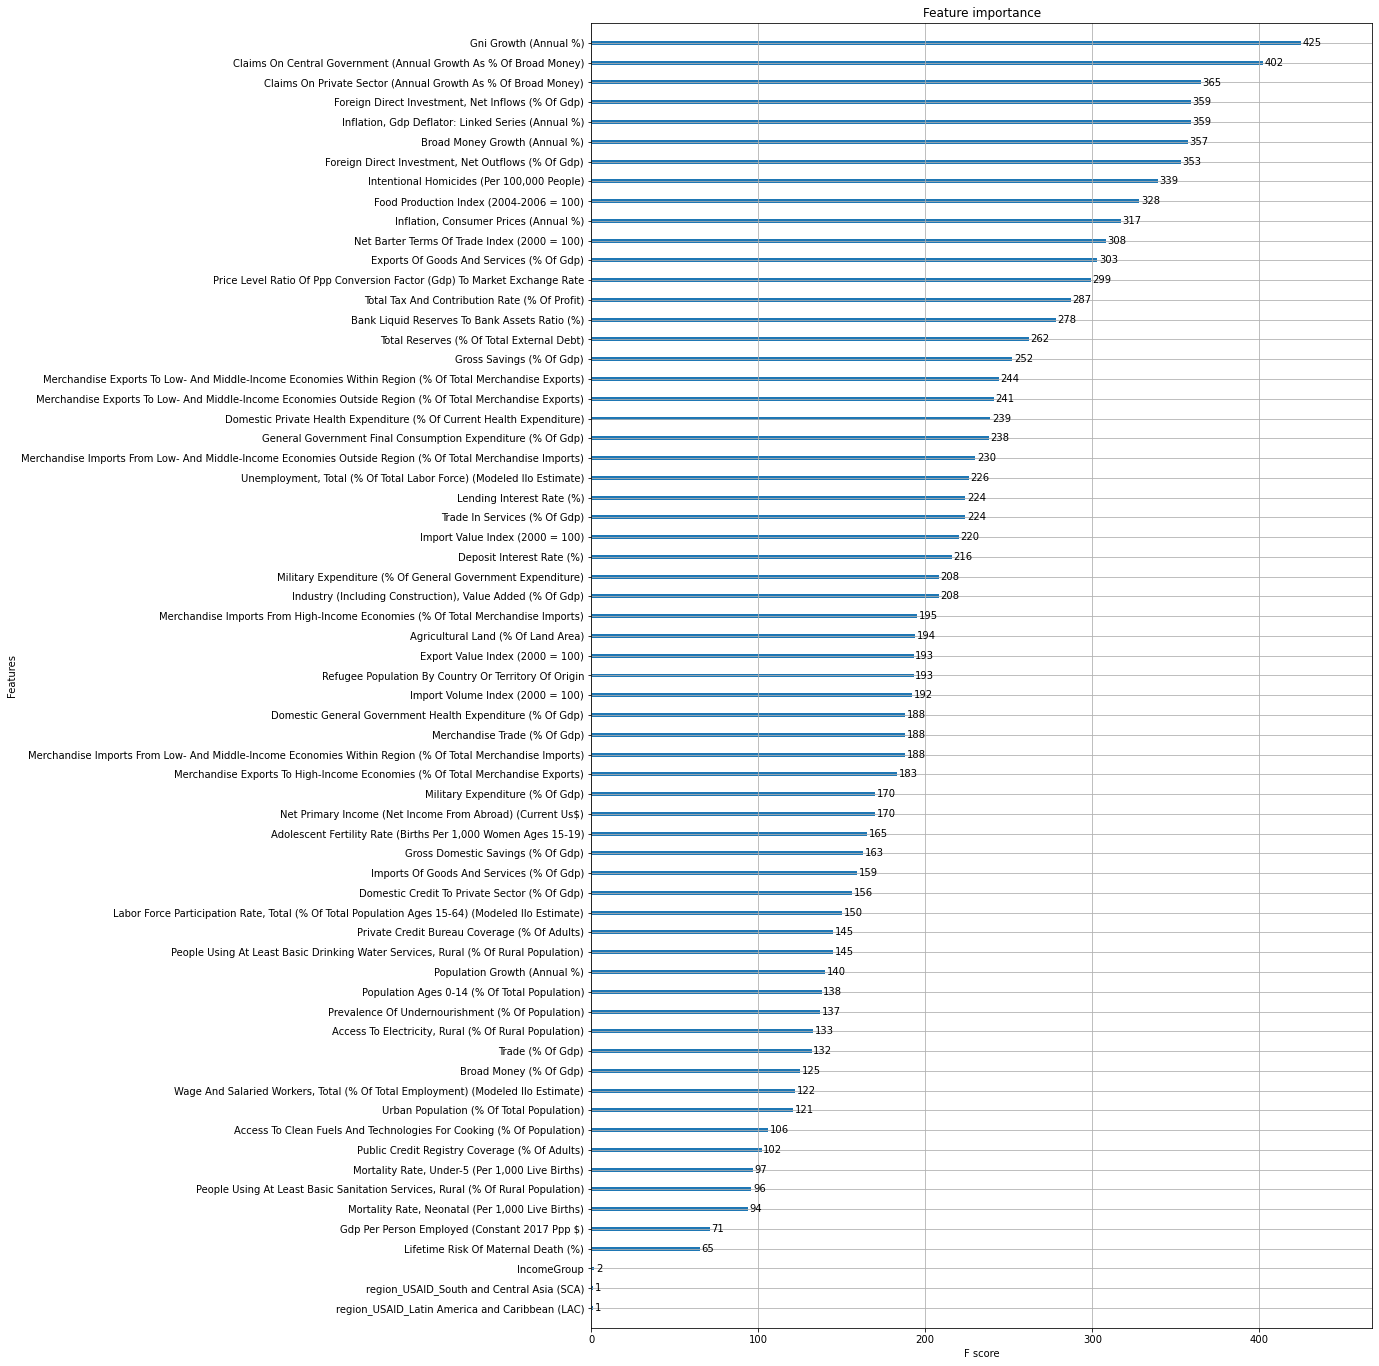

In [11]:
# plot feature importance
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 24)
plot_importance(model)
#pyplot.show()

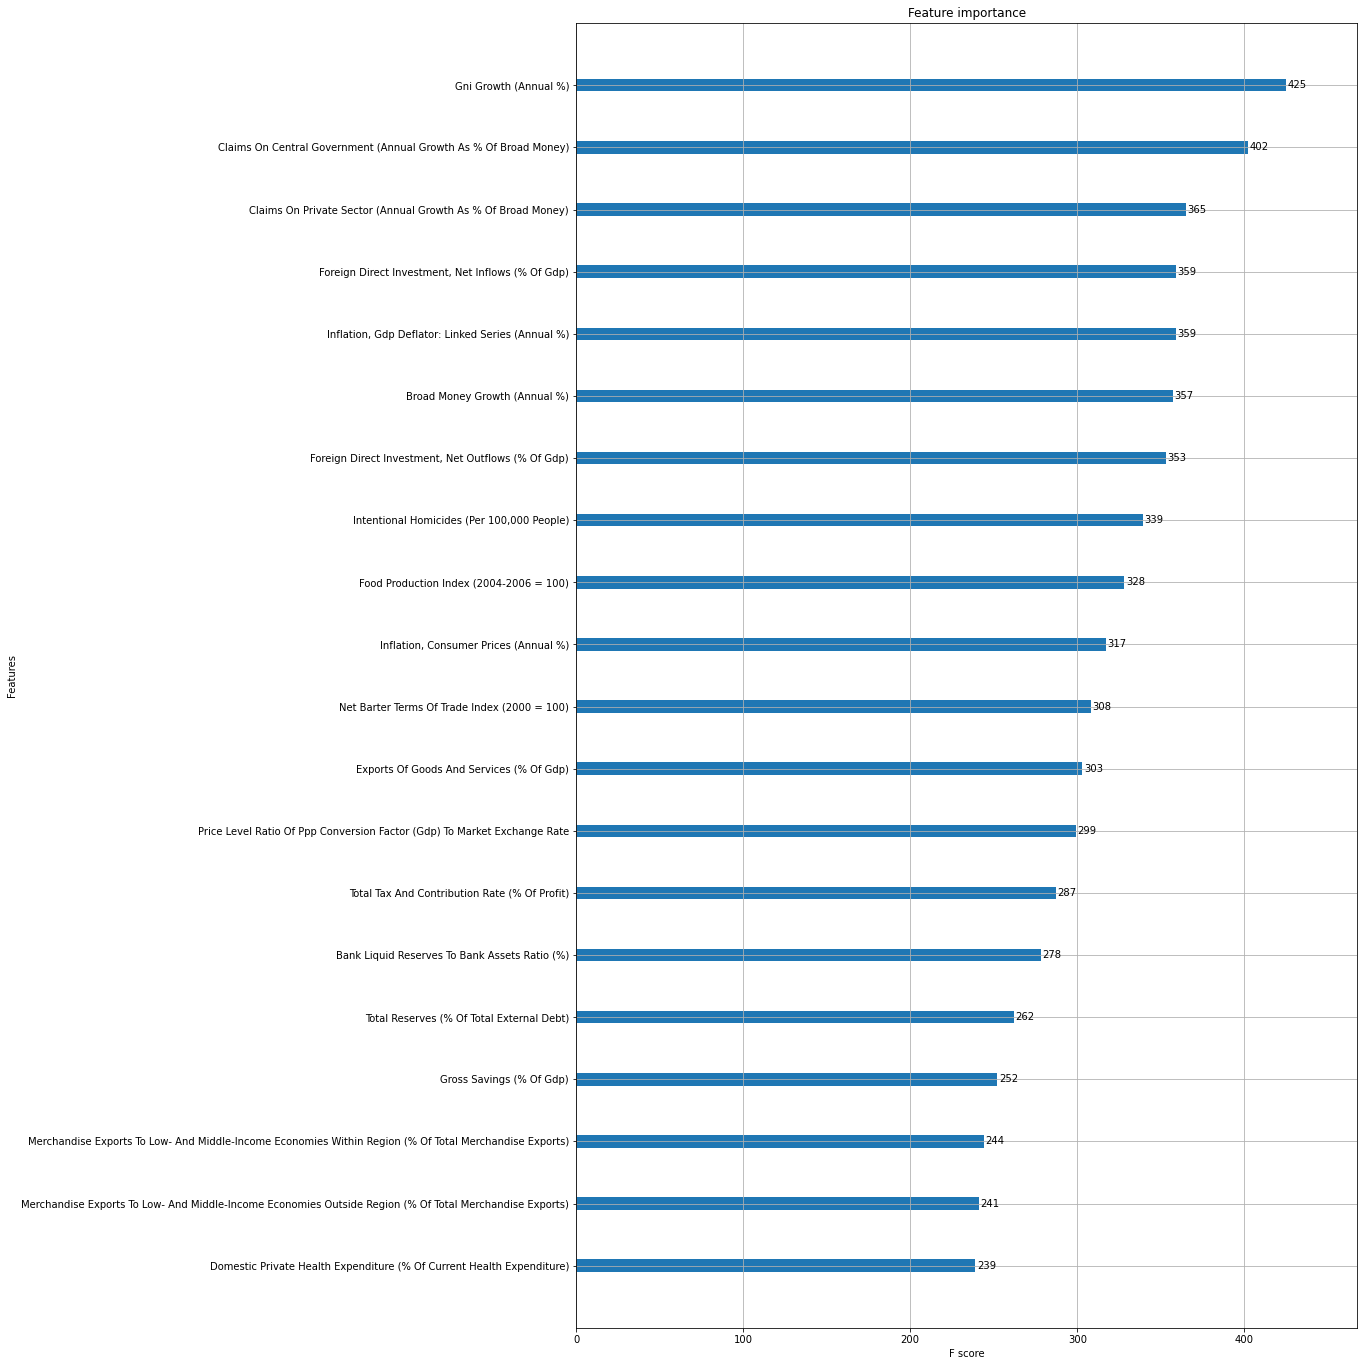

In [12]:
plot_importance(model,max_num_features=20)

In [13]:
fscore=model.get_booster().get_score()
fscore

{'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)': 183,
 'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)': 230,
 'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)': 195,
 'Inflation, Consumer Prices (Annual %)': 317,
 'Gross Savings (% Of Gdp)': 252,
 'Refugee Population By Country Or Territory Of Origin': 193,
 'Prevalence Of Undernourishment (% Of Population)': 137,
 'Inflation, Gdp Deflator: Linked Series (Annual %)': 359,
 'Domestic Private Health Expenditure (% Of Current Health Expenditure)': 239,
 'Population Growth (Annual %)': 140,
 'Imports Of Goods And Services (% Of Gdp)': 159,
 'Total Reserves (% Of Total External Debt)': 262,
 'Foreign Direct Investment, Net Inflows (% Of Gdp)': 359,
 'Industry (Including Construction), Value Added (% Of Gdp)': 208,
 'Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)': 122,
 'Merchandise Ex

In [14]:
df_score = pd.DataFrame(list(fscore.items()),columns = ['Indicators','F_score'])
df_score

,Indicators,F_score
0,Merchandise Exports To High-Income Economies (...,183
1,Merchandise Imports From Low- And Middle-Incom...,230
2,Merchandise Imports From High-Income Economies...,195
3,"Inflation, Consumer Prices (Annual %)",317
4,Gross Savings (% Of Gdp),252
...,...,...
60,Military Expenditure (% Of Gdp),170
61,"Labor Force Participation Rate, Total (% Of To...",150
62,region_USAID_Latin America and Caribbean (LAC),1
63,IncomeGroup,2


In [15]:
df_score.sort_values(by="F_score", ascending=False, inplace=True)
#df_score.to_csv('f_score.csv')


In [16]:
df_score

,Indicators,F_score
22,Gni Growth (Annual %),425
16,Claims On Central Government (Annual Growth As...,402
24,Claims On Private Sector (Annual Growth As % O...,365
7,"Inflation, Gdp Deflator: Linked Series (Annual %)",359
12,"Foreign Direct Investment, Net Inflows (% Of Gdp)",359
...,...,...
36,Gdp Per Person Employed (Constant 2017 Ppp $),71
51,Lifetime Risk Of Maternal Death (%),65
63,IncomeGroup,2
62,region_USAID_Latin America and Caribbean (LAC),1


In [17]:
df_score['Percentile_rank']=df_score.F_score.rank(pct=True)
df_top20=df_score[df_score['Percentile_rank'] >= 0.7].sort_values(by='F_score', ascending=False)
df_top20

,Indicators,F_score,Percentile_rank
22,Gni Growth (Annual %),425,1.000000
16,Claims On Central Government (Annual Growth As...,402,0.984615
24,Claims On Private Sector (Annual Growth As % O...,365,0.969231
7,"Inflation, Gdp Deflator: Linked Series (Annual %)",359,0.946154
12,"Foreign Direct Investment, Net Inflows (% Of Gdp)",359,0.946154
47,Broad Money Growth (Annual %),357,0.923077
53,"Foreign Direct Investment, Net Outflows (% Of ...",353,0.907692
35,"Intentional Homicides (Per 100,000 People)",339,0.892308
18,Food Production Index (2004-2006 = 100),328,0.876923
3,"Inflation, Consumer Prices (Annual %)",317,0.861538


In [18]:
len(df_top20)

20

In [19]:
selected_col = df_top20.Indicators.to_list()
selected_col

['Gni Growth (Annual %)',
 'Claims On Central Government (Annual Growth As % Of Broad Money)',
 'Claims On Private Sector (Annual Growth As % Of Broad Money)',
 'Inflation, Gdp Deflator: Linked Series (Annual %)',
 'Foreign Direct Investment, Net Inflows (% Of Gdp)',
 'Broad Money Growth (Annual %)',
 'Foreign Direct Investment, Net Outflows (% Of Gdp)',
 'Intentional Homicides (Per 100,000 People)',
 'Food Production Index (2004-2006 = 100)',
 'Inflation, Consumer Prices (Annual %)',
 'Net Barter Terms Of Trade Index (2000 = 100)',
 'Exports Of Goods And Services (% Of Gdp)',
 'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
 'Total Tax And Contribution Rate (% Of Profit)',
 'Bank Liquid Reserves To Bank Assets Ratio (%)',
 'Total Reserves (% Of Total External Debt)',
 'Gross Savings (% Of Gdp)',
 'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
 'Merchandise Exports To Low- And Middle-Income Economies

In [20]:
final = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/final.csv')
final.drop(['Unnamed: 0', 'Unnamed: 0.1','Index'],axis=1,inplace=True)
final.drop_duplicates(inplace=True)

In [21]:
base_col = ['Country Code', 'Year', 'Country Name',
       'Corruption Perception Index', 'IncomeGroup', 'region_USAID',
       'region_WorldBank']

In [22]:
columns = base_col + selected_col

In [23]:
columns

['Country Code',
 'Year',
 'Country Name',
 'Corruption Perception Index',
 'IncomeGroup',
 'region_USAID',
 'region_WorldBank',
 'Gni Growth (Annual %)',
 'Claims On Central Government (Annual Growth As % Of Broad Money)',
 'Claims On Private Sector (Annual Growth As % Of Broad Money)',
 'Inflation, Gdp Deflator: Linked Series (Annual %)',
 'Foreign Direct Investment, Net Inflows (% Of Gdp)',
 'Broad Money Growth (Annual %)',
 'Foreign Direct Investment, Net Outflows (% Of Gdp)',
 'Intentional Homicides (Per 100,000 People)',
 'Food Production Index (2004-2006 = 100)',
 'Inflation, Consumer Prices (Annual %)',
 'Net Barter Terms Of Trade Index (2000 = 100)',
 'Exports Of Goods And Services (% Of Gdp)',
 'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
 'Total Tax And Contribution Rate (% Of Profit)',
 'Bank Liquid Reserves To Bank Assets Ratio (%)',
 'Total Reserves (% Of Total External Debt)',
 'Gross Savings (% Of Gdp)',
 'Merchandise Exports To Low- And M

In [24]:
final_20_indicators = final[columns]

In [25]:
final_20_indicators.to_csv('selected_top_ind.csv')

In [26]:
final_20_indicators

,Country Code,Year,Country Name,Corruption Perception Index,IncomeGroup,region_USAID,region_WorldBank,Gni Growth (Annual %),Claims On Central Government (Annual Growth As % Of Broad Money),Claims On Private Sector (Annual Growth As % Of Broad Money),...,Net Barter Terms Of Trade Index (2000 = 100),Exports Of Goods And Services (% Of Gdp),Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate,Total Tax And Contribution Rate (% Of Profit),Bank Liquid Reserves To Bank Assets Ratio (%),Total Reserves (% Of Total External Debt),Gross Savings (% Of Gdp),Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports),Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports),Domestic Private Health Expenditure (% Of Current Health Expenditure)
0,AFG,2005,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,5.550398,2.222540,9.047853,...,118.164593,20.020771,0.236578,35.8,19.680361,207.531620,7.721033,37.158889,45.322232,78.970085
28,AFG,2006,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,5.694772,4.802149,10.962685,...,125.337219,16.175118,0.244705,35.8,18.909955,201.647032,9.165831,40.523890,42.873430,76.824974
56,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,5.786177,6.649365,20.120005,...,127.525841,16.530439,0.292742,35.8,17.016700,160.765930,11.207072,43.288417,40.820015,78.169991
84,AFG,2008,Afghanistan,15.0,Low income,South and Central Asia (SCA),South Asia,5.025873,5.542998,13.096462,...,130.765841,16.508105,0.286554,35.8,33.516167,141.900322,12.144143,73.383359,19.626527,75.403389
112,AFG,2009,Afghanistan,13.0,Low income,South and Central Asia (SCA),South Asia,5.360281,-5.353180,10.781435,...,140.398940,16.967302,0.288266,35.8,37.016988,171.996793,4.317279,66.215586,25.603877,72.779243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,ZMB,2015,Zambia,38.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,6.478653,5.010266,18.733948,...,170.322273,37.139711,0.389982,18.6,29.453355,24.902821,33.675997,24.124657,15.264974,16.503542
4016,ZMB,2016,Zambia,38.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,-0.295042,7.772315,-5.780047,...,164.847908,35.324663,0.376125,18.6,35.358428,15.318178,34.554535,21.940473,19.712628,19.215118
4018,ZMB,2017,Zambia,37.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,3.526700,24.028184,3.079128,...,183.300556,34.992889,0.440420,15.6,20.755055,11.883818,36.260185,19.220948,18.304572,18.788671
4020,ZMB,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,5.904849,6.809052,8.491411,...,174.734722,36.983166,0.431760,15.6,14.441583,8.208970,43.898918,20.943975,16.112272,22.866344


In [31]:
country_count = final_20_indicators['Country Name'].unique()
len(country_count)

62